     Year           County Harvested Acres
0    1981          Alameda          237308
1    1981           Amador          204659
2    1981            Butte          582690
3    1981        Calaveras          417289
4    1981           Colusa          510650
5    1981     Contra Costa          223193
6    1981        Del Norte           31450
7    1981        El Dorado          259076
8    1981           Fresno         2408754
9    1981            Glenn          495965
10   1981         Humboldt          348142
11   1981         Imperial          767846
12   1981             Inyo          205111
13   1981             Kern         3144245
14   1981            Kings          958382
15   1981             Lake          169650
16   1981           Lassen          491310
17   1981      Los Angeles          289352
18   1981           Madera          752765
19   1981            Marin          136040
20   1981         Mariposa          416650
21   1981        Mendocino          688951
22   1981  

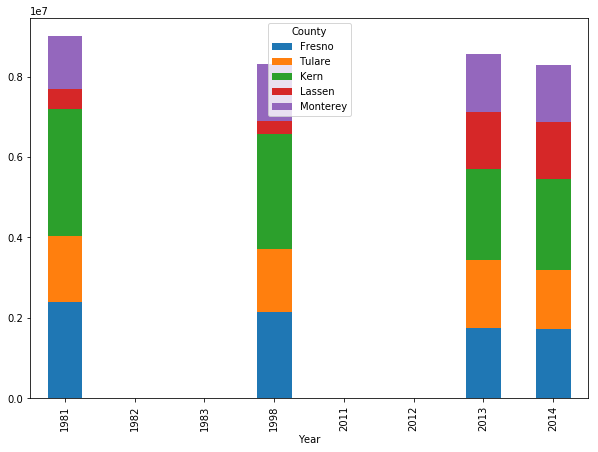

In [45]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

path =r'C:\Users\slalonde\Documents\Personal\DataChallenge\output\CASS'
filenames = glob.glob(path + "\*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all csv data into one DataFrame
fullDf = pd.concat(dfs, ignore_index=True)
filterDf = fullDf[['Year','Harvested Acres','County']].dropna(subset=['Harvested Acres']).copy()
plotDf = filterDf.groupby(['Year','County'])['Harvested Acres'].sum().reset_index()
pivotDf = plotDf.pivot(index='Year',columns='County', values='Harvested Acres')
pivotDf.loc[:,['Fresno','Tulare', 'Kern', 'Lassen', 'Monterey']].plot.bar(stacked=True, figsize=(10,7))

